# 文字探勘-聊天紀錄分析
* 動機  
想要看一下自己平常跟別人傳訊息的時候都使用了哪些詞彙。   
從聊天內容也許可以發現自己平常沒有注意到的行為模式，  
大概是一個很自嗨的小分析，不過也許對改良個人的習慣有所幫助，  
依照對自己的了解，預估會看到很多冗詞贅字

In [387]:
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import matplotlib.pyplot as plt
import codecs
from wordcloud import WordCloud
import os
import re

# 資料前處理
* 從LINE下載取得對方同意的聊天紀錄
* 清除不需要的字元

In [388]:
#載入聊天紀錄(G表示群組聊天、M表示和男生的對話、W表示和女生的對話)
with open("chat history/lineM1.txt", "r", encoding = "utf-8") as m1:
    print(m1.read())
m1.close

﻿[LINE] 與Jack的聊天記錄
儲存日期：2019/05/08 12:14

2019/03/04(週一)
18:32	謝侑均	吃飯ㄇ
22:01	謝侑均	http://guitarcplusplus.blogspot.com/2014/02/0.html
22:02	謝侑均	https://bbs.csdn.net/topics/20259606
22:02	謝侑均	http://oilcut123.pixnet.net/blog/post/357299888-%5B%E7%A8%8B%E5%BC%8F%5D-%E5%88%9D%E5%AD%B8%E8%80%85%E5%AD%B8%E7%BF%92%E5%8B%95%E6%85%8B%E8%A8%98%E6%86%B6%E9%AB%94%E5%B8%B8%E7%8A%AF%E7%9A%84%E4%B8%80%E5%80%8B%E9%8C%AF%E8%AA%A4
23:36	Jack	哇嗚
23:36	Jack	大感恩
23:36	Jack	祝你微積分穩(Har Har)

2019/03/07(週四)
13:07	謝侑均	您已結束通話

2019/03/10(週日)
16:40	謝侑均	[檔案]
16:40	謝侑均	[檔案]
17:58	謝侑均	[檔案]
21:00	謝侑均	[檔案]
21:01	謝侑均	14 324 1057

2019/03/11(週一)
1:01	Jack	[照片]
1:01	Jack	欸幹這樣會算嗎
1:01	Jack	QQ
1:01	Jack	不過我有先交一份 但有一題沒寫
1:02	Jack	幹擊敗系統
1:02	謝侑均	[照片]
1:02	謝侑均	笑死幹
1:02	Jack	.......
1:02	謝侑均	可是窩沒寫完
1:02	Jack	乾
1:02	謝侑均	[檔案]
1:02	Jack	我也沒寫完
1:02	Jack	但我這樣
1:03	Jack	會不會算缺交
1:03	Jack	...
1:03	謝侑均	我也有點好奇
1:03	謝侑均	他沒有其他紀錄
1:03	Jack	好像沒有
1:03	Jack	幹...
1:03	謝侑均	可是助教應該沒這ㄇ靠北把
1:04	謝侑均	這應該手動看
1:04	Jack	你們作業是助教用嗎
1:04	謝侑均	是
1:04	Jack	有點

<function TextIOWrapper.close()>

In [389]:
chatM1 = ''

with open("chat history/lineM1.txt", "r", encoding = "utf-8") as m1:
    for sentence in m1:
        #print(sentence)
        sentence = re.sub('Jack','對方',sentence)
        sentence = re.sub(r'[^\u4e00-\u9fa5]', " ",sentence)#只保留中文和空格
        #sentence = re.sub(r'[A-Za-z]+','',sentence) 去掉英文
        #sentence = re.sub(r'\d+','',sentence) #去掉數字
        #sentence = re.sub(':','',sentence) #去掉冒號
        #print(sentence)
        chatM1 += sentence
    chatM1 = re.sub(r'\s{2,}',' ',chatText) #去掉兩個以上空格
    #chatText = re.sub('\n',' ',chatText)
    print(chatM1)
m1.close

 與對方的聊天記錄 儲存日期 週一 謝侑均 吃飯 謝侑均 謝侑均 謝侑均 對方 哇嗚 對方 大感恩 對方 祝你微積分穩 週四 謝侑均 您已結束通話 週日 謝侑均 檔案 謝侑均 檔案 謝侑均 檔案 謝侑均 檔案 謝侑均 週一 對方 照片 對方 欸幹這樣會算嗎 對方 對方 不過我有先交一份 但有一題沒寫 對方 幹擊敗系統 謝侑均 照片 謝侑均 笑死幹 對方 謝侑均 可是窩沒寫完 對方 乾 謝侑均 檔案 對方 我也沒寫完 對方 但我這樣 對方 會不會算缺交 對方 謝侑均 我也有點好奇 謝侑均 他沒有其他紀錄 對方 好像沒有 對方 幹 謝侑均 可是助教應該沒這 靠北把 謝侑均 這應該手動看 對方 你們作業是助教用嗎 謝侑均 是 對方 有點想寫信問 對方 怕 謝侑均 明天直接問 對方 檔案 謝侑均 阿你第二周影片看 對方 給你開我 對方 完全亂寫 對方 豪 那我明天問哈哈 對方 沒 對方 我只看了兩個 對方 謝侑均 還是有分喇 對方 乾嗚嗚 謝侑均 幹先準備洗洗睡 對方 希望他不要太 謝侑均 想起來昨天睡三個小時 謝侑均 狗幹 對方 靠哈哈哈哈哈 對方 扯 對方 我昨天睡蠻爽 對方 快去睡 對方 我要去耍廢 對方 好累 謝侑均 幹我跟上進度 好爽 謝侑均 阿你怎沒來上課 對方 真假哈哈哈哈 對方 幹我還欠至少兩個禮拜 對方 完蛋 對方 今天直接放風 對方 我跟別人在外面混哈哈哈 謝侑均 啊會來台大 謝侑均 我今天可以開摸了 對方 來了 對方 哈哈哈哈 對方 欸幹你們下課了嗎 對方 我要問助教作業的 對方 有點想欸 對方 我今天應該沒要認真的打算 對方 哈哈哈哈哈哈 謝侑均 可來教室問 謝侑均 通話時間 週四 對方 您已結束通話 對方 通話時間 對方 我翹會計 對方 想說看你有沒有要唸書哈哈哈 謝侑均 通話時間 對方 通話時間 對方 乾突然沒聲音 對方 爛網路 謝侑均 對方 那你要的話再來哈哈哈 對方 還是看你要幹嘛 謝侑均 可 對方 可可 謝侑均 你等下沒課 對方 讚讚 對方 對方 微積分實習 謝侑均 我有點想去討論室 謝侑均 還不想去自習室 對方 你說總圖 謝侑均 還是你要會計廳讀也是可 謝侑均 對方 母湯 對方 讀不下去 對方 哈哈哈哈哈 對方 可可阿 那你要現在去 謝侑均 我好想躺著 謝侑均 我現在沒有動力 對方 還敢耍懶阿 對方 哈哈哈哈哈 對方 影片看完沒 謝侑均 

<function TextIOWrapper.close()>

# 透過TF-IDF提取聊天關鍵字

In [390]:
tags = jieba.analyse.extract_tags(chatM1, 30)
print(tags)

['對方', '謝侑均', '哈哈哈', '應該', '通話', '哈哈', '有點', '時間', '貼圖', '照片', '週一', '還是', '總圖', '還沒', '好像', '週日', '檔案', '你們', '討論室', '我們', '真假', '完蛋', '不過', '作業', '我現', '這禮', '怎麼', '資管', '學校', '函數']


### 小觀察  

可以看到我和這個人的聊天內容大部份都是  
哈哈哈跟哈哈或是應該、真假這類營養價值低的用詞  
當這些詞大量出現的時候就把比較具有獨特性的對話蓋掉  

此外發現聊天時段集中在週一和週日  
推測是因為週日到週一的凌晨是必修課的作業截止日期

# 畫出文字雲
* 視覺化

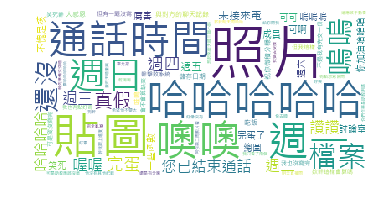

<Figure size 1000x600 with 0 Axes>

In [391]:
stopwords = {}.fromkeys(['對方',"謝侑均"]) # 建立停用字
wc = WordCloud(font_path=r'msjh.ttc',
                background_color="white", #背景顏色
               max_words = 200 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(chatM1)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

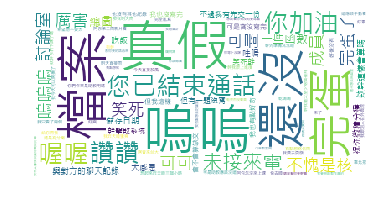

<Figure size 1000x600 with 0 Axes>

In [392]:
#嘗試去掉更多沒有用的詞彙
chatM1 = re.sub('哈','',chatText) #先刪掉哈
stopwords = {}.fromkeys(['對方',"謝侑均","應該",'貼圖','通話','有點','照片','通話時間','噢噢','週日','週一','週四','週五','週二','週三','週六']) # 建立停用字
wc = WordCloud(font_path=r'msjh.ttc',
                background_color="white", #背景顏色
               max_words = 200 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(chatM1)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

### 小觀察  
這階段有些看起來沒有意義的詞彙我沒有刪掉  
一方面是太多了，另一方面是這些詞我可能只有在跟這個人聊天的時候才會用到  

[真假]出現的頻率相當高，看來我們對對方說的話都不是太信任  
[檔案、還沒、完蛋]是緊接著出現的  
原因可能一樣和必修課(資料結構)作業有關，每一次出現作業就會伴隨著這些詞

到了這步終於可以大略看出我和這個人對話的獨特性  

# 加入其他聊天紀錄

In [393]:
#載入其他聊天紀錄
def readChat(fileName):
    chat = ''
    with open(fileName, "r", encoding = "utf-8") as file:
        for sentence in file:
            sentence = re.sub(r'[^\u4e00-\u9fa5]', " ",sentence)#只保留中文和空格
            chat += sentence
        chat = re.sub(r'\s{2,}',' ',chat) #去掉兩個以上空格
        file.close
        return '\n' + chat 
    
chatALL = ''
chatALL += readChat("chat history/lineM1.txt")
chatALL += readChat("chat history/lineW1.txt")
chatALL += readChat("chat history/lineW2.txt")
chatALL += readChat("chat history/lineG1.txt")

# 透過jieba分詞量化詞頻

In [394]:
chatCut = jieba.cut(chatALL, cut_all = False)

#加上停用詞表(去掉人名)  
stopwords = [line.strip() for line in open("stop.txt").readlines()]  

counts = {}  
for word in chatCut:  
    #不在停用詞表中  
    if word not in stopwords:  
        #不統計字數爲一的詞  
        if len(word) == 1:  
            continue  
        else:  
            counts[word] = counts.get(word,0) + 1  
items = list(counts.items())  
items.sort(key=lambda x:x[1], reverse=True)   
for i in range(30):  
    word, count = items[i]  
    print ("{:<10}{:>7}".format(word, count))

照片            266
可以            131
不要            124
貼圖            108
直接             92
明天             82
知道             81
什麼             77
不是             76
真的             74
所以             73
通話             71
時間             71
還是             70
管圖             70
好像             65
自己             63
應該             60
哈哈哈            59
今天             59
可是             55
一個             55
這個             55
這樣             54
一下             53
有點             47
現在             47
怎麼             46
是不是            46
不然             46


# 透過TF-IDF提取關鍵字

In [395]:
for word in stopwords:
    chatALL = re.sub(word,' ',chatALL) #去掉人名

tags = jieba.analyse.extract_tags(chatALL, 100)
print(tags)

['照片', '貼圖', '現在', '什麼', '通話', '時間', '還是', '管圖', '覺得', '應該', '一個', '這個', '這樣', '不要', '哈哈哈', '有點', '怎麼', '那個', '明天', '不會', '可以', '剛剛', '直接', '週一', '週四', '週三', '週二', '秀娟', '靠北', '真的', '三小', '還沒', '發現', '幾點', '好像', '沒有', '已經', '週日', '週五', '時候', '不然', '作業', '知道', '還在', '其實', '怎樣', '所以', '感覺', '出來', '今天', '不是', '還有', '結果', '週六', '這麼', '學校', '影片', '是不是', '可是', '因為', '一下', '會計', '程設', '真假', '結束', '有要', '哈哈哈哈', '等等', '總圖', '自己', '一起', '宿舍', '微積分', '開始', '東西', '他們', '未接', '哈哈', '兩個', '哪裡', '群組', '智障', '到底', '有人', '來電', '出門', '一點', '還好', '認識', '幹嘛', '英文', '資料', '那邊', '晚點', '忘記', '記得', '下課', '楊子', '如果', '不用']


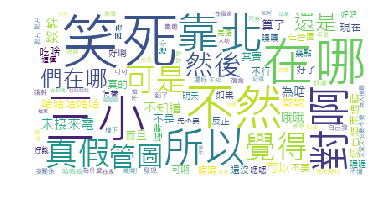

<Figure size 1000x600 with 0 Axes>

In [408]:
stopwords = {}.fromkeys(['週一',"週二",'週三','週四','週五','週六','週日','貼圖','照片','通話時間']) # 建立停用字
wc = WordCloud(font_path=r'msjh.ttc',
                background_color="white", #背景顏色
               max_words = 100 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(chatALL)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

# 結論
目前用的資料都是和很親密的人的對話  
所以參雜著很多沒營養的贅詞和不堪入目的話 
另外個人使用的通訊軟體聊天紀錄最多的是instagram,不過還無法蒐集IG的聊天紀錄  
這次作業使用的都是line上的紀錄,資料量還不夠  
之後要加上更多紀錄  
此外要增加大量停用詞才有辦法汲取更有用的訊息  
這次還稍微可以看到[管圖][資管][總圖][微積分]這類透露出我的日常習慣的詞彙  
如果再做的更精確一點  
也許就能透過聊天內容掌握自己的行蹤了